In [1]:
from IDC.components.data_injection import test2


x = test2(1) 
print(x)

3


In [2]:
from IDC.logger import logging
from IDC.exception import CustomException
import sys 


try:
    a =1/0 
except Exception as e:
    logging.error(e)
    logging.error("This is a custom exception")
    raise CustomException(e,sys)



CustomException: Error occured in python script name [/tmp/ipykernel_30701/2448032345.py] line number [7] error message[division by zero]

In [ ]:
logging.error("Hello World")

In [5]:
from IDC.utils.common import load_yaml


config = load_yaml(dir)

print(config)



ImportError: cannot import name 'load_yaml' from 'IDC.utils.common' (/home/amzad/Desktop/IDC2/src/IDC/utils/common.py)

In [3]:
import yaml

def read_yaml(yaml_path):
    """
    Read yaml file and return a dictionary
    """
    with open(yaml_path, "r") as yaml_file:
        yaml_dict = yaml.load(yaml_file, Loader=yaml.FullLoader)
    return yaml_dict


In [6]:
dir =r'/home/amzad/Desktop/IDC/config/config.yaml'
x = read_yaml(dir) 

In [7]:
x



{'train_config': {'batch_size': 32,
  'epochs': 10,
  'learning_rate': 0.001,
  'optimizer': 'adam',
  'loss': 'binary_crossentropy',
  'metrics': ['accuracy']},
 'transform_config': {'patch_size': 250},
 'model_config': {'densnet_121': {'backbone': 'ImageNet',
   'epoch': 10,
   'freeze_layers': 39,
   'activation': 'softmax',
   'loss': 'binary_crossentropy',
   'lr': 0.0001,
   'optimizer': 'SGD',
   'batch_size': 64,
   'learning_rate_mood': 'cylical_learning_rate'},
  'desnet_169': {'backbone': 'ImageNet',
   'epoch': 10,
   'freeze_layers': 36,
   'activation': 'softmax',
   'dropout': 0.5,
   'loss': 'binary_crossentropy',
   'lr': 0.0001,
   'optimizer': 'SGD',
   'batch_size': 64,
   'learning_rate_mood': 'cylical_learning_rate'},
  'resnet50': {'backbone': 'ImageNet',
   'epoch': 10,
   'freeze_layers': 41,
   'activation': 'softmax',
   'loss': 'kullback_leibler_divergence',
   'lr': 0.0001},
  'resnet101': {'backbone': 'ImageNet',
   'epoch': 10,
   'freeze_layers': 36,
   

In [35]:
import os 
dir_2=r"/home/amzad/Downloads/archive (1)/IDC/testing/0"

x = os.listdir(dir_2) 


In [15]:
import pandas as pd 

label = [0]*len(x)
paths = [dir_2+'/'+i for i in x]
df_1 = pd.DataFrame(list(zip(paths,label)),columns =['image','label'])


In [16]:
df_1.head()

,image,label
0,/home/amzad/Downloads/archive (1)/IDC/testing/...,0
1,/home/amzad/Downloads/archive (1)/IDC/testing/...,0
2,/home/amzad/Downloads/archive (1)/IDC/testing/...,0
3,/home/amzad/Downloads/archive (1)/IDC/testing/...,0
4,/home/amzad/Downloads/archive (1)/IDC/testing/...,0


In [17]:
dir_3 = r"/home/amzad/Downloads/archive (1)/IDC/testing/1"

x = os.listdir(dir_3)
paths= [os.path.join(dir_3,i) for i in x]
label = [1]*len(x)

df_2 = pd.DataFrame(list(zip(paths,label)),columns =['image','label'])

In [18]:
df_2.head()

,image,label
0,/home/amzad/Downloads/archive (1)/IDC/testing/...,1
1,/home/amzad/Downloads/archive (1)/IDC/testing/...,1
2,/home/amzad/Downloads/archive (1)/IDC/testing/...,1
3,/home/amzad/Downloads/archive (1)/IDC/testing/...,1
4,/home/amzad/Downloads/archive (1)/IDC/testing/...,1


In [19]:
#merge the two dataframes
df = pd.concat([df_1,df_2],axis=0)
df.head()

df.shape
df.to_csv('train_data.csv',index=False)


In [26]:
import torch
import numpy as np
import os
from torch.utils.data import Dataset 
from cv2 import imread
import pandas as pd 
import albumentations as A 

transform = A.Compose([

    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    A.Resize(250,250),
])


class IDCDATALOADER(Dataset):
    '''
    args : data_dir : str : path to the data directory 
           ransform : torchvision.transforms : data augmentation techniques
           config : dict : configuration dictionary
           batch_size : int : batch size           
    return : image : torch.tensor : image tensor

    summary : This class is used to load the IDC dataset. 
            It inherits from the Dataset class of PyTorch.
    
    
    '''
    def __init__(self,data_df_path,transform=None):
        
        
        self.data_df_path= pd.read_csv(data_df_path)
        self.transform = transform
    

    def __len__(self):
        """
            return : int : length of the dataset 
        """
        return len(self.data_df_path)
    
    def __getitem__(self, idx):
        """
            arg : idx : int : index of the image to be loaded 
            return : image : torch.tensor : image tensor 
        
        """
        image = imread(self.data_df_path.iloc[idx,0])
        label = self.data_df_path.iloc[idx,1]
        if self.transform:
            image = self.transform(image=image)['image']
        return image, label
    

In [27]:
train_df_path = r'/home/amzad/Desktop/IDC2/dataset/train_data.csv'

from torch.utils.data import DataLoader

data = IDCDATALOADER(train_df_path,transform=transform)

train_loader = DataLoader(data,batch_size=32,shuffle=True)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(1)


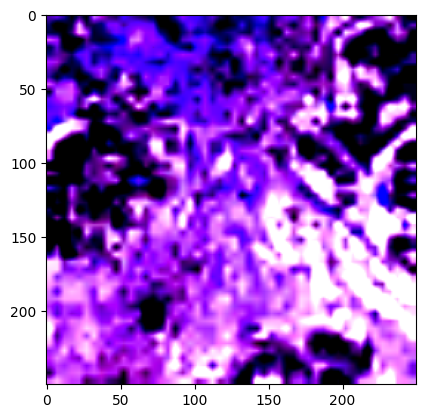

In [28]:
import matplotlib.pyplot as plt
import numpy as np

img , label = next(iter(train_loader))

img = img[0].squeeze()
plt.imshow(img,cmap='gray')
print(label[0])


In [29]:
img.shape

torch.Size([250, 250, 3])

In [51]:
import torch

class densnet121(torch.nn.Module):
    def __init__(selfn,num_classes=2):
        super(densnet121,self).__init__()
        self.densnet121 = torch.hub.load('pytorch/vision:v0.6.0', 'densenet121', pretrained=True)
        self.densnet121.classifier = torch.nn.Linear(1024,num_classes)

        
    def forward(self,x):
        x = self.densnet121(x)
        return x

In [60]:
inputs = torch.randn(1,3,250,250).to('cuda')

In [56]:
!pip install torch-summary==1.4.4 

In [61]:
model = densnet121().to('cuda')


Using cache found in /home/amzad/.cache/torch/hub/pytorch_vision_v0.6.0


In [64]:
from torchsummary import summary

summary(model,inputs)

TypeError: rand(): argument 'size' failed to unpack the object at pos 2 with error "type must be tuple of ints,but got Tensor"